In [1]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from withClustAnalysis import *
from PixelEM import * 

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# compile MV PRJ result from each cluster to CSV
MV_df = compile_cluster_MV_prj_into_csv()
# Pick best clusters for each object sample based on MV
best_clust_df = best_worker_picking()
# compile all algo and MV PRJs into one big table
df = compile_all_algo_PRJs()

In [4]:
df_best_thresh = compile_best_thresh_all_algo_PRJs()

In [7]:
# Extracting important clusters only
best_clust_best_thresh_df = filter_best_clust(df_best_thresh,best_clust_df)

In [8]:
best_clust_no_thresh_df  = filter_best_clust(df,best_clust_df)

### Performance as it varies with number of workers

In [12]:
# MV should be the same, whether best thresh picked or not (since MV indept of thresh)
assert best_clust_best_thresh_df[best_clust_best_thresh_df["algo"]=="MV"]["j"].mean() == best_clust_no_thresh_df["J [MV]"].mean()

In [13]:
#best_thres_best_clust_df[["objid","J [GTLSA]"]]#.objid.unique()#.groupby("num_workers")["J [MV]"]

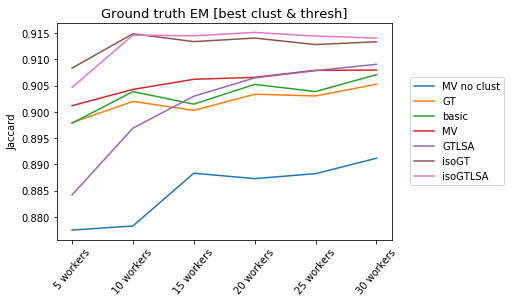

In [15]:
Nworker_performance = best_clust_best_thresh_df.groupby(['algo','num_workers'],as_index=False)[['j']].mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering

MV_withClust = np.array(Nworker_performance[Nworker_performance["algo"]=='MV']["j"])
MV = pd.read_csv("pixel_em/MV_PRJ_table.csv") 
MV_noClust = np.array(MV.groupby("num_workers").mean()["MV_jaccard"])
plt.plot(MV_noClust,label="MV no clust")
for algo in list(set(Nworker_performance["algo"])):
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [best clust]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [best clust & thresh]",fontsize=13)

In [16]:
print "isoGTLSA_best_clust_thresh=",list(Nworker_performance[Nworker_performance["algo"]=='isoGTLSA']["j"])
print "isoGT_best_clust_thresh=",list(Nworker_performance[Nworker_performance["algo"]=='isoGT']["j"])
print "MV_best_clust_thresh=", list(Nworker_performance[Nworker_performance["algo"]=='MV']["j"])

isoGTLSA_best_clust_thresh= [0.90463541336014908, 0.91458567928207901, 0.91445433627535455, 0.91509998355111133, 0.91440239676109492, 0.91401509392399838]
isoGT_best_clust_thresh= [0.90831055516941461, 0.91484260365788872, 0.9133473651005376, 0.91402077554211425, 0.91278798138950545, 0.91331639816440935]
MV_best_clust_thresh= [0.90116813336493884, 0.9042672110984209, 0.90618466949756016, 0.90655800812427256, 0.90788598237719309, 0.90793752580574993]


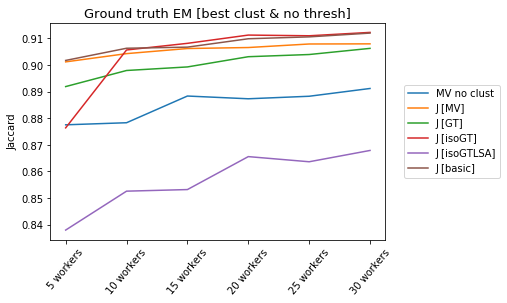

In [17]:
Nworker_performance = best_clust_no_thresh_df.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering
MV = pd.read_csv("pixel_em/MV_PRJ_table.csv") 
MV_noClust = np.array(MV.groupby("num_workers").mean()["MV_jaccard"])
plt.plot(MV_noClust,label="MV no clust")

for algo in metric_J:
    if '[GTLSA]' not in algo:#exclude *GTLSA for now
        plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [best clust & no thresh]",fontsize=13)

In [18]:
print "isoGTLSA_best_clust_no_thresh=",list(Nworker_performance['J [isoGTLSA]'])
print "isoGT_best_clust_no_thresh=",list(Nworker_performance['J [isoGT]'])
print "MV_best_clust_no_thresh=", list(Nworker_performance['J [MV]'])

isoGTLSA_best_clust_no_thresh= [0.83798513327754942, 0.85260123233056029, 0.85319940681821504, 0.86557959249206329, 0.86364630057192693, 0.86789370397528687]
isoGT_best_clust_no_thresh= [0.87637800778911845, 0.90563932604972763, 0.9081308416431505, 0.91123537087537898, 0.91097207169619554, 0.91224160583644398]
MV_best_clust_no_thresh= [0.90116813336494128, 0.90426721109841968, 0.90618466949755916, 0.90655800812427378, 0.90788598237719176, 0.90793752580574927]


# Greedy Algo Results

In [19]:
greedy_df = compile_withClust_greedy_algos_to_csv()
# best_clust = greedy_df.loc[greedy_df.groupby(['sample','objid','cluster_id'])["j"].idxmax()]

In [20]:
greedy_df = filter_best_clust(greedy_df,best_clust_df)

In [21]:
assert int(greedy_df.groupby(["num_workers","objid","sample_num","algo"]).count()["j"].unique())==1

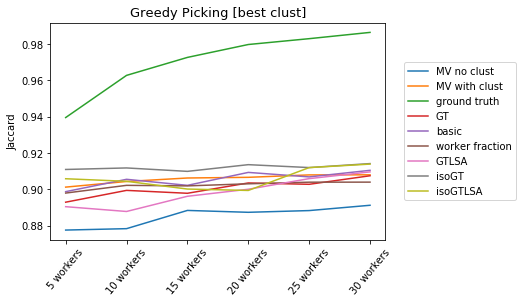

In [22]:
Nworker_performance = greedy_df.groupby(['algo','num_workers'],as_index=False)[['j']].mean()
plt.plot(MV_noClust,label="MV no clust")
plt.plot(MV_withClust,label="MV with clust")
for algo in list(set(Nworker_performance["algo"])):
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [best clust]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])


In [23]:
print "greedy_ground_truth=",list(Nworker_performance[Nworker_performance["algo"]=="ground truth"]['j'])
print "greedy_best_clust_isoGT=",list(Nworker_performance[Nworker_performance["algo"]=="isoGT"]['j'])
print "greedy_best_clust_worker_frac=",list(Nworker_performance[Nworker_performance["algo"]=="worker fraction"]['j'])

greedy_ground_truth= [0.93945579463386852, 0.96266602709650861, 0.97255700868926886, 0.97965396048192555, 0.98286834173734094, 0.9863217494865455]
greedy_best_clust_isoGT= [0.91087815642516201, 0.91171807743536248, 0.90983655930196838, 0.91352433722823823, 0.91192492479916643, 0.9141222300016667]
greedy_best_clust_worker_frac= [0.89789288455882865, 0.9021416858188871, 0.90184085235351585, 0.90299242828784521, 0.90387937369357174, 0.90390956205647621]


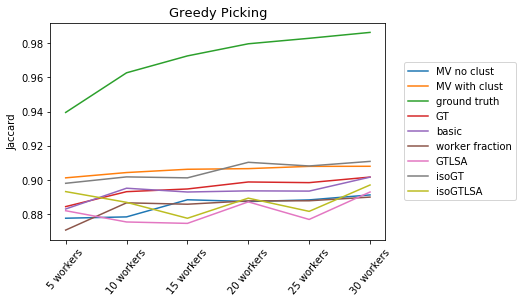

In [24]:
noClust_greedy_df = compile_noClust_greedy_algos_to_csv()
Nworker_performance = noClust_greedy_df.groupby(['algo','num_workers'],as_index=False)[['j']].mean()
plt.plot(MV_noClust,label="MV no clust")
plt.plot(MV_withClust,label="MV with clust")

for algo in list(set(Nworker_performance["algo"])):
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])


In [25]:
print "greedy_no_clust_isoGT=",list(Nworker_performance[Nworker_performance["algo"]=="isoGT"]['j'])
print "greedy_no_clust_worker_frac=",list(Nworker_performance[Nworker_performance["algo"]=="worker fraction"]['j'])

greedy_no_clust_isoGT= [0.89798084966980929, 0.90172692332783833, 0.90115935241699163, 0.91026799603210795, 0.90811380044456835, 0.91080227077649989]
greedy_no_clust_worker_frac= [0.87059208586784431, 0.88653805811473196, 0.88572357142652258, 0.88768491119243764, 0.88774048826785179, 0.88989101610129528]


### Compare between best thresh, best cluster thresh, no filtering

In [41]:
isoGT= [0.86180714318405227, 0.8988109346737535, 0.90404005468171478, 0.90954740011618374, 0.90776463234071514, 0.91052706488955748]
isoGT_best_thresh= [0.88030482691468614, 0.90370402275291195, 0.90762227879598867, 0.91135894959171038, 0.90901508399830366, 0.91165606774023689]
isoGT_best_clust_thresh= [0.90831055516941461, 0.91484260365788872, 0.9133473651005376, 0.91402077554211425, 0.91278798138950545, 0.91331639816440935]
isoGT_best_clust_no_thresh= [0.87637800778911845, 0.90563932604972763, 0.9081308416431505, 0.91123537087537898, 0.91097207169619554, 0.91224160583644398]

isoGTLSA= [0.86001952128075243, 0.8852958258350111, 0.88859038520376588, 0.89840505843053553, 0.89202225166859883, 0.90219252902030678]
isoGTLSA_best_thresh= [0.87519051694562056, 0.8998780616894021, 0.90556915704845498, 0.9106581626726421, 0.90980669965364624, 0.911292941153929]
isoGTLSA_best_clust_thresh= [0.90463541336014908, 0.91458567928207901, 0.91445433627535455, 0.91509998355111133, 0.91440239676109492, 0.91401509392399838]
isoGTLSA_best_clust_no_thresh= [0.83798513327754942, 0.85260123233056029, 0.85319940681821504, 0.86557959249206329, 0.86364630057192693, 0.86789370397528687]
#################################
greedy_ground_truth= [0.93945579463386852, 0.96266602709650861, 0.97255700868926886, 0.97965396048192555, 0.98286834173734094, 0.9863217494865455]
greedy_best_clust_isoGT= [0.91087815642516201, 0.91171807743536248, 0.90983655930196838, 0.91352433722823823, 0.91192492479916643, 0.9141222300016667]
greedy_best_clust_worker_frac= [0.89789288455882865, 0.9021416858188871, 0.90184085235351585, 0.90299242828784521, 0.90387937369357174, 0.90390956205647621]

greedy_no_clust_isoGT= [0.89798084966980929, 0.90172692332783833, 0.90115935241699163, 0.91026799603210795, 0.90811380044456835, 0.91080227077649989]
greedy_no_clust_worker_frac= [0.87059208586784431, 0.88653805811473196, 0.88572357142652258, 0.88768491119243764, 0.88774048826785179, 0.88989101610129528]

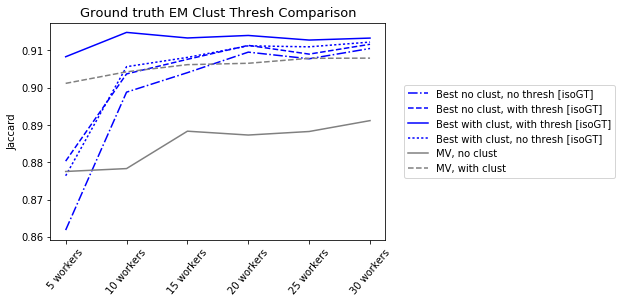

In [42]:
algoDict=[{"val":isoGT,"name":'Best no clust, no thresh [isoGT]','color':"blue",'linestyle':"-."},
    {"val":isoGT_best_thresh,"name":'Best no clust, with thresh [isoGT]','color':"blue",'linestyle':"--"},
    {"val":isoGT_best_clust_thresh,"name":'Best with clust, with thresh [isoGT]','color':"blue",'linestyle':"-"},
    {"val":isoGT_best_clust_no_thresh,"name":'Best with clust, no thresh [isoGT]','color':"blue",'linestyle':":"},

    {"val":MV_noClust,"name":'MV, no clust','color':"gray",'linestyle':"-"},
    {"val":MV_withClust,"name":'MV, with clust','color':"gray",'linestyle':"--"},
]

metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
for algo in algoDict:
    plt.plot(algo["val"],label=algo["name"],color=algo["color"],linestyle=algo["linestyle"])
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM Clust Thresh Comparison",fontsize=13)

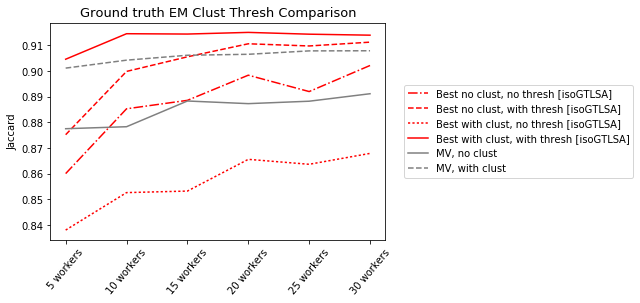

In [43]:
algoDict=[
    {"val":isoGTLSA,"name":'Best no clust, no thresh [isoGTLSA]','color':"red",'linestyle':"-."},
    {"val":isoGTLSA_best_thresh,"name":'Best no clust, with thresh [isoGTLSA]','color':"red",'linestyle':"--"},
    {"val":isoGTLSA_best_clust_no_thresh,"name":'Best with clust, no thresh [isoGTLSA]','color':"red",'linestyle':":"},
    {"val":isoGTLSA_best_clust_thresh,"name":'Best with clust, with thresh [isoGTLSA]','color':"red",'linestyle':"-"},
    
    {"val":MV_noClust,"name":'MV, no clust','color':"gray",'linestyle':"-"},
    {"val":MV_withClust,"name":'MV, with clust','color':"gray",'linestyle':"--"},
]

metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
for algo in algoDict:
    plt.plot(algo["val"],label=algo["name"],color=algo["color"],linestyle=algo["linestyle"])
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM Clust Thresh Comparison",fontsize=13)


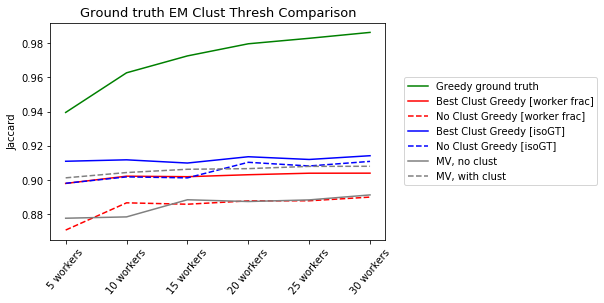

In [44]:
algoDict=[{"val":greedy_ground_truth,"name":'Greedy ground truth','color':"green",'linestyle':"-"},

    {"val":greedy_best_clust_worker_frac,"name":'Best Clust Greedy [worker frac]','color':"red",'linestyle':"-"},
    {"val":greedy_no_clust_worker_frac,"name":'No Clust Greedy [worker frac]','color':"red",'linestyle':"--"},

    {"val":greedy_best_clust_isoGT,"name":'Best Clust Greedy [isoGT]','color':"blue",'linestyle':"-"},
    {"val":greedy_no_clust_isoGT,"name":'No Clust Greedy [isoGT]','color':"blue",'linestyle':"--"},

    {"val":MV_noClust,"name":'MV, no clust','color':"gray",'linestyle':"-"},
    {"val":MV_withClust,"name":'MV, with clust','color':"gray",'linestyle':"--"}
]
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
for algo in algoDict:
    plt.plot(algo["val"],label=algo["name"],color=algo["color"],linestyle=algo["linestyle"])
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM Clust Thresh Comparison",fontsize=13)

# Debugging bad objects

In [30]:
basic_info=['clust', u'num_workers', u'objid','sample_num', u'thresh']

In [39]:
best_clust_best_thresh_df[best_clust_best_thresh_df["j"]<0.5]

,sample_num,num_workers,objid,clust,algo,j,p,r,thresh
15590,7,5,42,-1,basic,0.117800,0.992258,0.117909,-2
16270,8,5,7,-1,GTLSA,0.494432,0.899121,0.523471,2
16916,9,5,15,-1,GTLSA,0.213232,0.213412,0.996063,4
16919,9,5,15,-1,isoGTLSA,0.213232,0.213412,0.996063,4


In [29]:
sample = "5workers_rand0"
objid=7
cluster_id=1

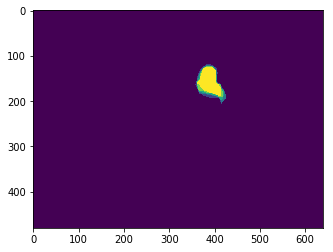

In [30]:
mega_mask = get_mega_mask(sample,objid,0)
plt.imshow(mega_mask)

In [31]:
mega_mask = get_mega_mask(sample,objid,cluster_id)

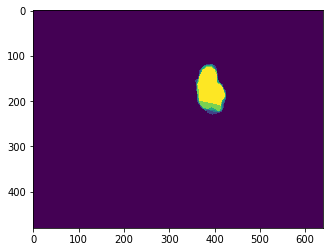

In [32]:
plt.imshow(mega_mask)

In [33]:
print PIXEL_EM_DIR

/srv/data/home/jlee782/segmentation/analysis/pixel_em/


In [45]:
deriveGTinGroundTruthExperiments(sample,objid,"GT",[2],1,exclude_isovote=False,SAVE_GT_MASK=True,rerun_existing=True)

/srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand0/obj7/clust1/
p,r,j: 0.865449493947 0.970189098999 0.843031123139


In [35]:
deriveGTinGroundTruthExperiments(sample,objid,"GT",[2],1,exclude_isovote=True,SAVE_GT_MASK=True,rerun_existing=True)

/srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand0/obj7/clust1/
p,r,j: 0.941197822142 0.576863181313 0.556796220743


In [48]:
def visually_debug(sample,objid,cluster_id,algo):
    PIXDIR = "pixel_em/{}/obj{}/clust{}/".format(sample,objid,cluster_id)
    pInT = pkl.load(open("{}{}_p_in_mask_ground_truth.pkl".format(PIXDIR,algo)))
    pNotInT = pkl.load(open("{}{}_p_not_in_ground_truth.pkl".format(PIXDIR,algo)))
    gt_est = pkl.load(open("{}{}_gt_est_ground_truth_mask_thresh2.pkl".format(PIXDIR,algo)))

    plt.figure()
    plt.imshow(pInT)
    plt.title("pInT")
    plt.colorbar()
    plt.figure()
    plt.imshow(pNotInT)
    plt.title("pNotInT")
    plt.colorbar()
    plt.figure()
    plt.imshow(gt_est)
    plt.title("gt_est")
    plt.colorbar()

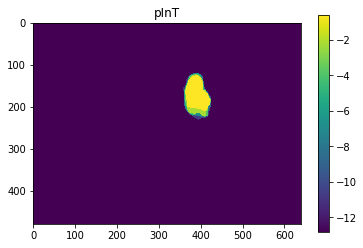

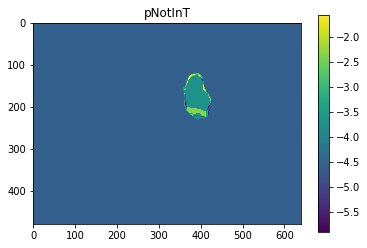

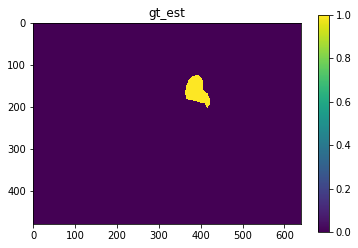

In [50]:
visually_debug(sample,objid,cluster_id,"isoGT")

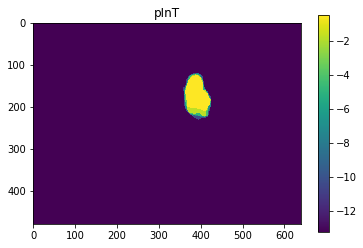

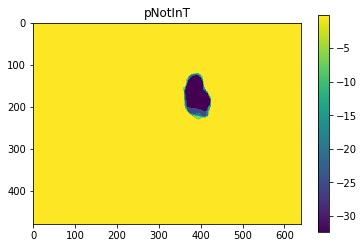

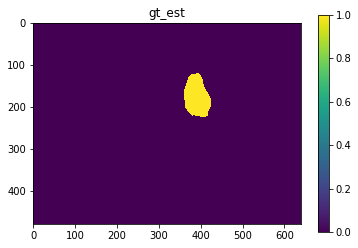

In [51]:
visually_debug(sample,objid,cluster_id,"GT")